In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from collections import Counter

# Note
Start from the cell that says START HERE, since land_details_99_perc_unique.csv is not included in the git repo (since it's a few hundred MB)

In [2]:
df = pd.read_csv("../data/land_details_99_perc_unique.csv")
df.head()

PROPERTY_ID  DISTRICT_CODE DISTRICT_NAME PROPERTY_NAME HOUSE_NUMBER  \
0      2467629            222       LITHGOW           NaN            2   
1      1026597             98         KIAMA           NaN            5   
2      2621868            234   BROKEN HILL           NaN            7   
3      2682306            253       WALGETT           NaN          NaN   
4      3267646            528   YASS VALLEY           NaN           35   

  STREET_NAME      SUBURB_NAME  POSTCODE ZONE_CODE  AREA_M2  
0  PURCELL ST        BOWENFELS    2790.0        B1    613.4  
1  JOHNSON ST      KIAMA DOWNS    2533.0        B1    183.4  
2   WARREN ST      BROKEN HILL    2880.0       SP1   4452.0  
3       19-10  LIGHTNING RIDGE    2834.0       SP1   2500.0  
4  LAIDLAW ST             YASS    2582.0        B6  10240.0

In [3]:
df_for_graph = df[["SUBURB_NAME", "POSTCODE"]]
df_for_graph.isna().sum()

SUBURB_NAME    0
POSTCODE       4
dtype: int64

In [4]:
df_for_graph.dropna(inplace=True)
df_for_graph.isna().sum()

C:\Users\OMG\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


SUBURB_NAME    0
POSTCODE       0
dtype: int64

In [5]:
# hacky way to convert postcode string to a whole number
df_for_graph.POSTCODE = df_for_graph.POSTCODE.astype(int).astype(str)

C:\Users\OMG\miniconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
# find the unique combinations of suburb name, postcode
pair_count = Counter(map(tuple, df_for_graph.values.tolist()))
unique_pairs = list(pair_count.keys())
unique_pairs[:5]

[('BOWENFELS', '2790'),
 ('KIAMA DOWNS', '2533'),
 ('BROKEN HILL', '2880'),
 ('LIGHTNING RIDGE', '2834'),
 ('YASS', '2582')]

In [15]:
with open("../data/unique-suburb-postcode-pairs.csv","w") as outfile:
    outfile.write("\n".join((",".join(pair) for pair in unique_pairs)))

# START HERE

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from collections import Counter

with open("../data/unique-suburb-postcode-pairs.csv", "r") as infile:
    unique_pairs = [tuple(line.split(",")) for line in infile.read().split("\n")]
unique_pairs[:5]

[('BOWENFELS', '2790'),
 ('KIAMA DOWNS', '2533'),
 ('BROKEN HILL', '2880'),
 ('LIGHTNING RIDGE', '2834'),
 ('YASS', '2582')]

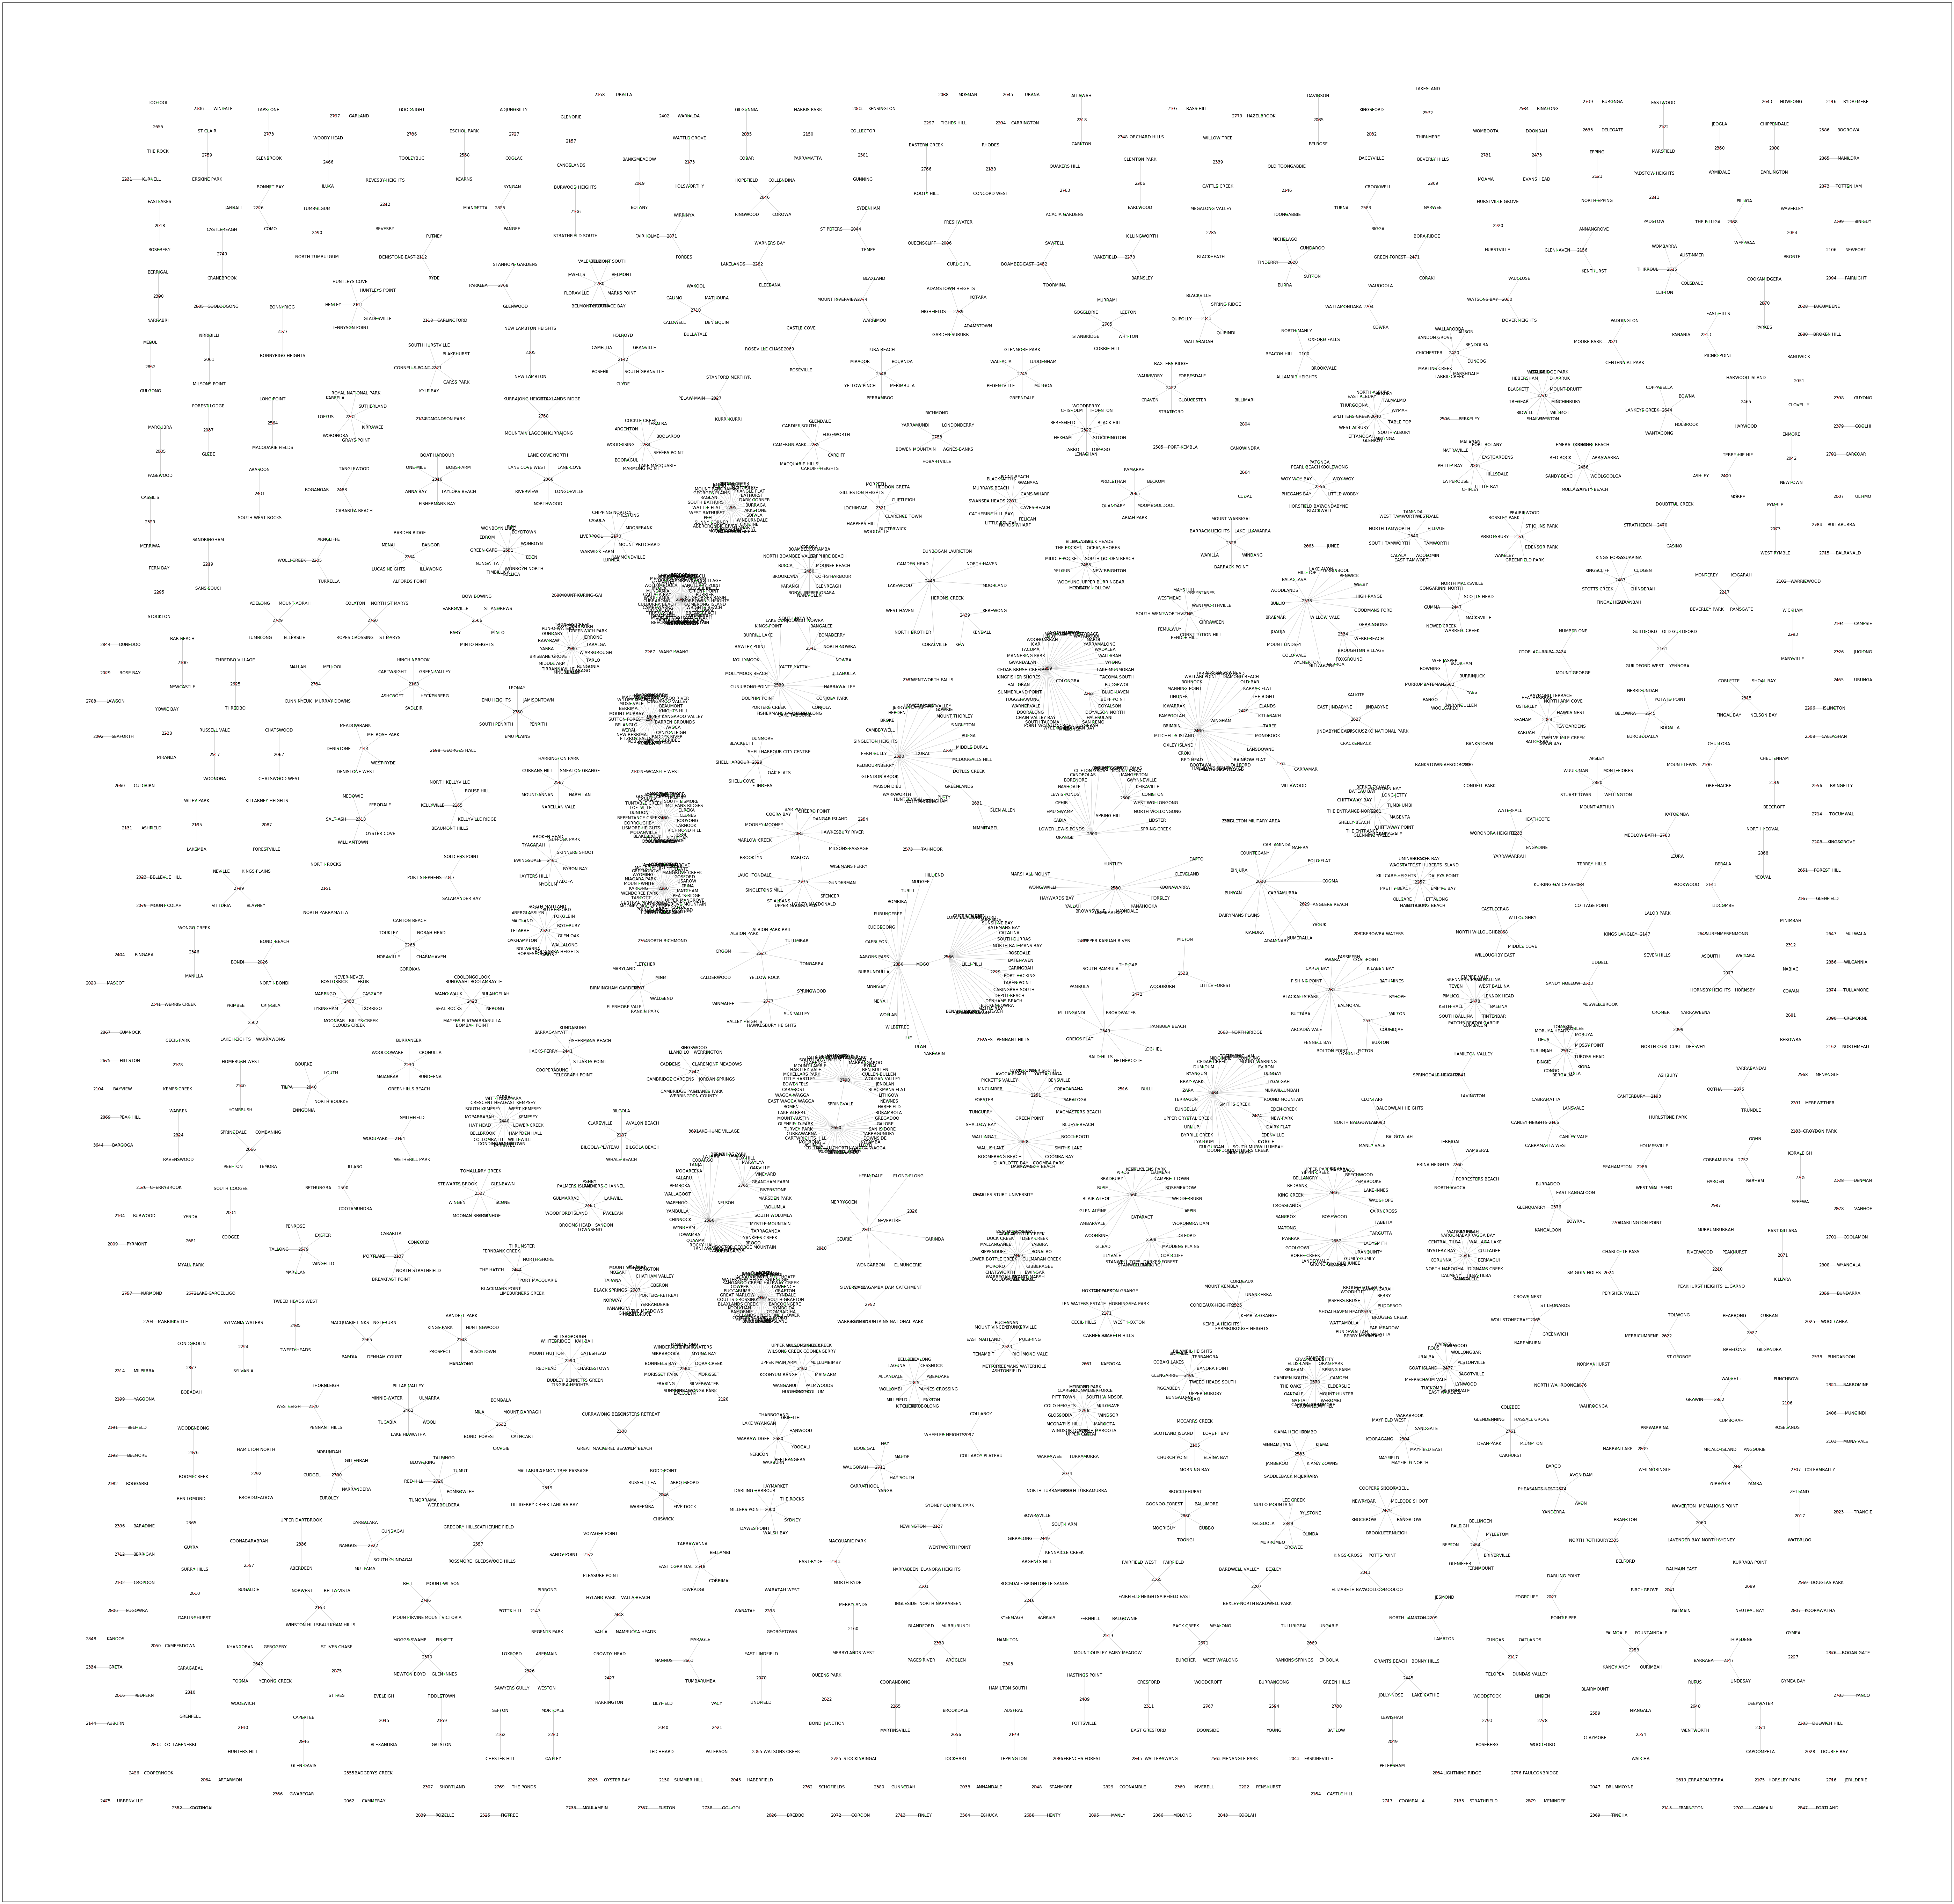

In [18]:
fig,ax = plt.subplots(figsize=(100,100))
G = nx.Graph()
# use a subset of data due to strange limitations in graphviz
G.add_edges_from(unique_pairs[:2500])

# colour nodes based on if they are postcodes or suburb names
node_is_postcode = [ele.isnumeric() for ele in G.nodes()]
node_color = [(1,0,0) if ele else (0,1,0) for ele in node_is_postcode]

pos = graphviz_layout(G, prog="twopi")
nx.draw_networkx_labels(G,pos=pos, font_size=12)
nx.draw_networkx_edges(G, pos=pos, arrowsize=1, alpha=0.2)
nx.draw_networkx_nodes(G, pos=pos, node_size=5, node_color=node_color)

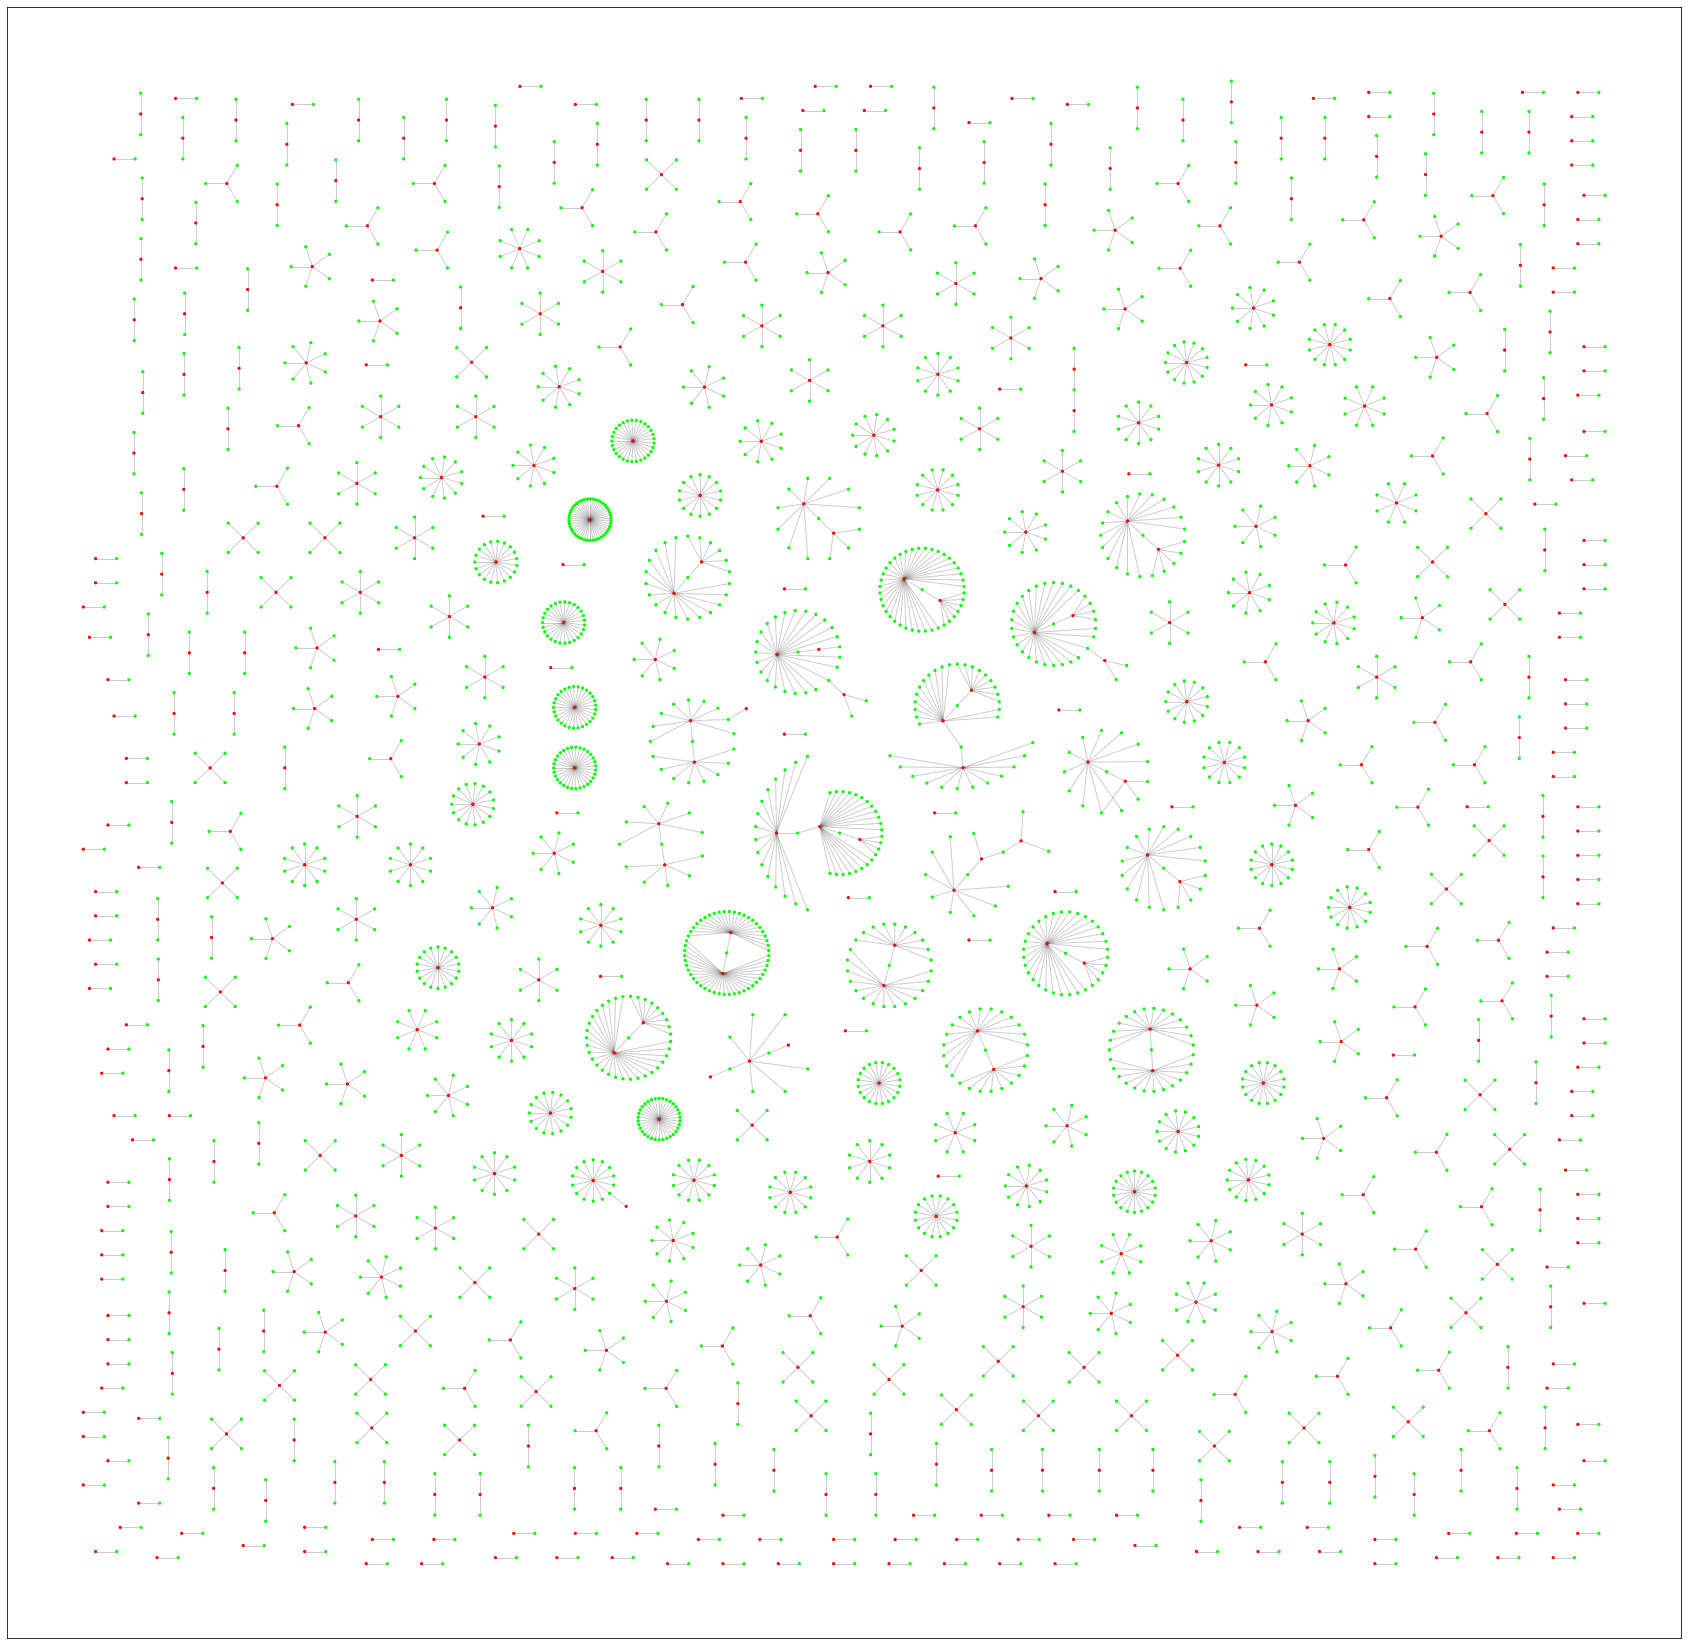

In [19]:
fig,ax = plt.subplots(figsize=(30,30))
G = nx.Graph()
# use a subset of data due to strange limitations in graphviz
G.add_edges_from(unique_pairs[:2500])

# colour nodes based on if they are postcodes or suburb names
node_is_postcode = [ele.isnumeric() for ele in G.nodes()]
node_color = [(1,0,0) if ele else (0,1,0) for ele in node_is_postcode]

pos = graphviz_layout(G, prog="twopi")
nx.draw_networkx_edges(G, pos=pos, arrowsize=1, alpha=0.2)
nx.draw_networkx_nodes(G, pos=pos, node_size=5, node_color=node_color)